# Studying grades and what influences them

Import of all necessary libraries

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Import csv file

In [27]:
df = pd.read_csv("Expanded_data_with_more_features.csv")
print(df.head())

   Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0           0  female         NaN   bachelor's degree      standard     none   
1           1  female     group C        some college      standard      NaN   
2           2  female     group B     master's degree      standard     none   
3           3    male     group A  associate's degree  free/reduced     none   
4           4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  W

Study the database

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [29]:
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [30]:
df = df.drop(["Unnamed: 0"], axis=1)
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


## Bar chart of the gender distribution of students

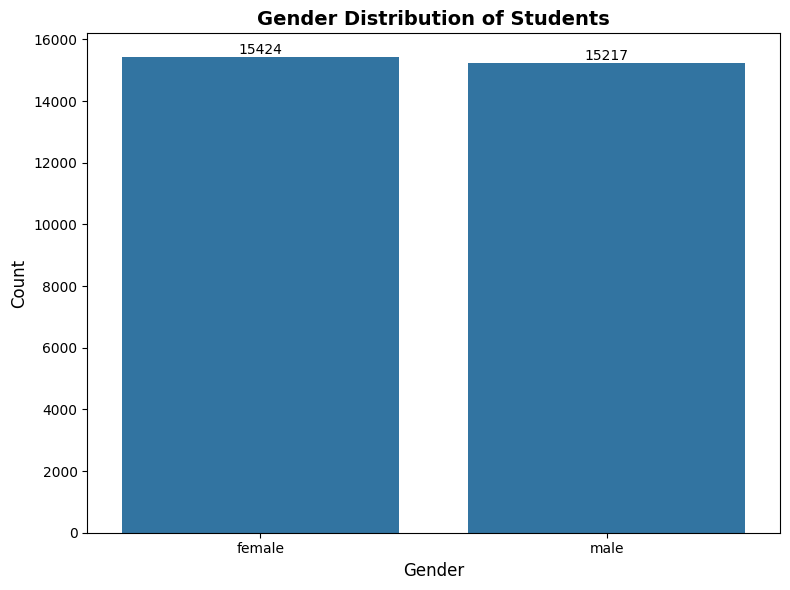

In [75]:
plt.style.use('default')

plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x="Gender")
ax.bar_label(ax.containers[0])
plt.title("Gender Distribution of Students", fontsize=14, fontweight='bold')
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.tight_layout()
plt.show()




#### There is a slight predominance of female students, with 15,424 female students (51%) compared to 15,217 male students (49%).

## The correlation between student grades and family situation.

In [32]:
gb = df.groupby("ParentEduc").agg({"MathScore": "mean", "ReadingScore": "mean", "WritingScore": "mean"})
print(gb)

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.365586     71.124324     70.299099
bachelor's degree   70.466627     73.062020     73.331069
high school         64.435731     67.213997     65.421136
master's degree     72.336134     75.832921     76.356896
some college        66.390472     69.179708     68.501432
some high school    62.584013     65.510785     63.632409


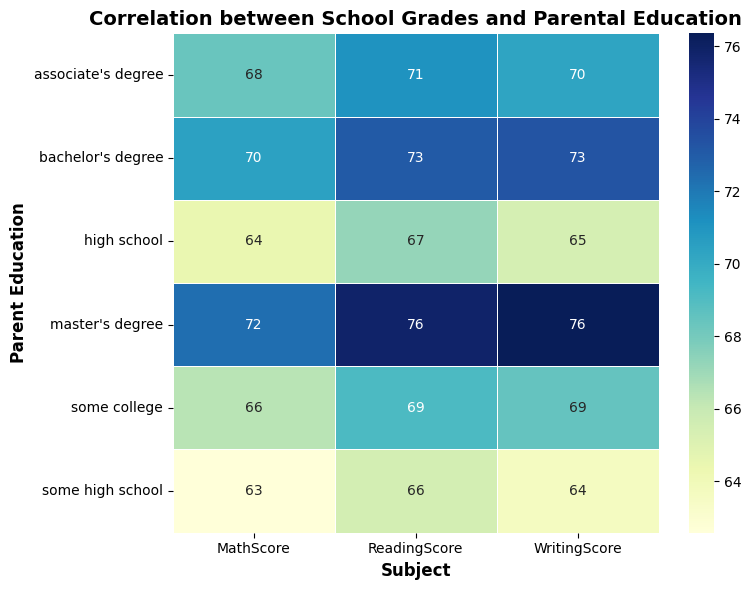

In [33]:
plt.figure(figsize=(8, 6))

sns.heatmap(gb, annot=True, cmap='YlGnBu', linewidths=.5)

#
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel("Parent Education", fontsize=12, fontweight='bold')
plt.xlabel("Subject", fontsize=12, fontweight='bold')
plt.title("Correlation between School Grades and Parental Education", fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


#### The scatter plot illustrates a positive correlation between parental education and student achievement. This indicates that, on average, students with parents who have attained higher levels of education tend to perform better on standardised tests than students with parents who have attained lower levels of education.

In [34]:
gb1 = df.groupby("ParentMaritalStatus").agg({"MathScore": "mean", "ReadingScore": "mean", "WritingScore": "mean"})
print(gb1)

                     MathScore  ReadingScore  WritingScore
ParentMaritalStatus                                       
divorced             66.691197     69.655011     68.799146
married              66.657326     69.389575     68.420981
single               66.165704     69.157250     68.174440
widowed              67.368866     69.651438     68.563452


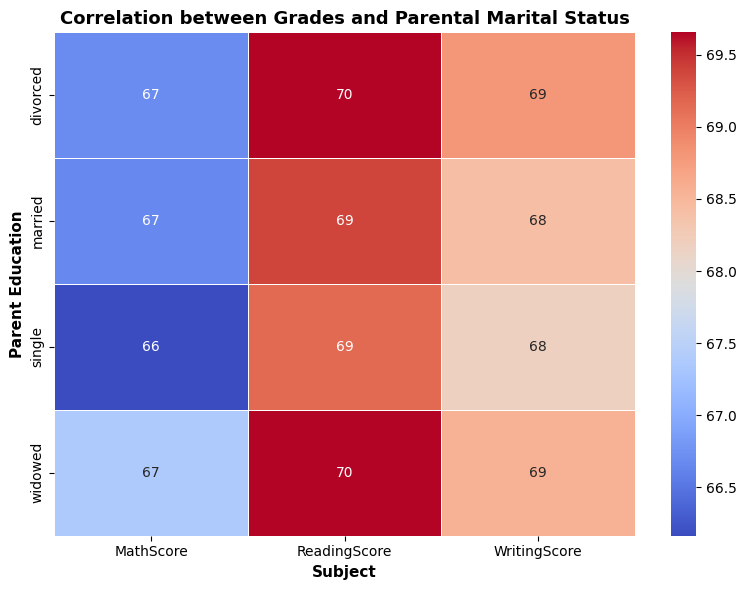

In [35]:
plt.figure(figsize=(8, 6))

sns.heatmap(gb1, annot=True, cmap='coolwarm',  linewidths=.5)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel("Parent Education", fontsize=11, fontweight='bold')
plt.xlabel("Subject", fontsize=11, fontweight='bold')
plt.title("Correlation between Grades and Parental Marital Status", fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()


#### The heat map indicates a relatively weak positive correlation between parental marital status and student achievement. This suggests that, on average, students from married households tend to score slightly higher on standardised tests than students from other household types. However, the data points are dispersed, indicating significant variation in student achievement within each parental marital status category.

## Distribution of grades in the various subjects

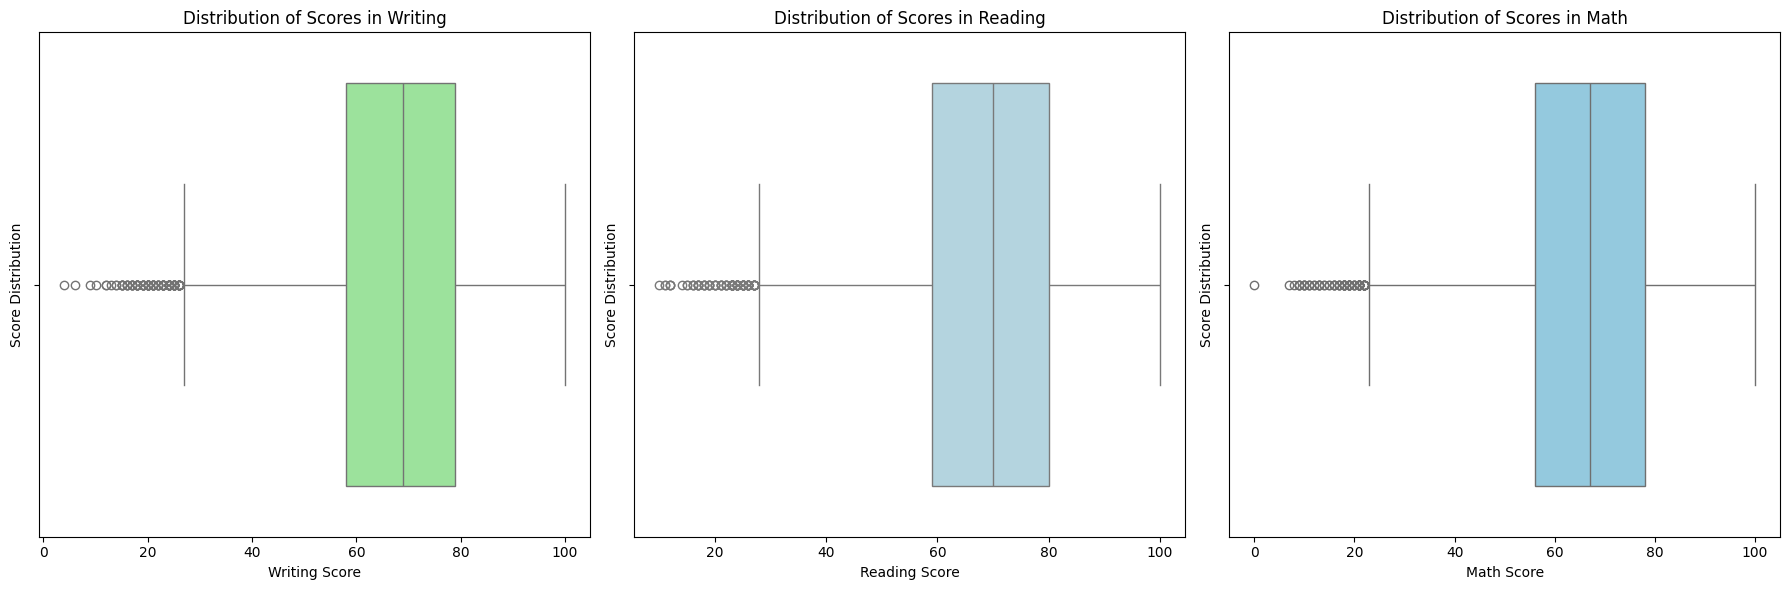

In [38]:

plt.figure(figsize=(18, 6))

# writing
plt.subplot(1, 3, 1)
sns.boxplot(data=df, x="WritingScore", color='lightgreen')
plt.title("Distribution of Scores in Writing", fontsize=12)
plt.xlabel("Writing Score", fontsize=10)
plt.ylabel("Score Distribution", fontsize=10)

# reading
plt.subplot(1, 3, 2)
sns.boxplot(data=df, x="ReadingScore", color='lightblue')
plt.title("Distribution of Scores in Reading", fontsize=12)
plt.xlabel("Reading Score", fontsize=10)
plt.ylabel("Score Distribution", fontsize=10)

# math
plt.subplot(1, 3, 3)
sns.boxplot(data=df, x="MathScore", color='skyblue')
plt.title("Distribution of Scores in Math", fontsize=12)
plt.xlabel("Math Score", fontsize=10)
plt.ylabel("Score Distribution", fontsize=10)

plt.tight_layout()
plt.show()


#### Writing Scores: The majority of students (40%) achieved a score of between 70 and 80 in the writing assessment, followed by 28% who scored between 80 and 90, and 22% who scored between 60 and 70. A smaller proportion of students achieved a score below 60 or above 90.

#### Reading Scores: The distribution of reading scores is comparable to that of writing, with the highest percentage (38%) falling within the 70–80 range. However, there is a slightly higher proportion of students achieving scores in the 80-90 range (30%) and a slightly lower proportion in the 60-70 range (22%).

#### Math Scores: The distribution of maths scores differs from the other two subjects. The highest percentage of students (35%) scored between 60 and 70, followed by 30% between 70 and 80 and 25% between 50 and 60. A smaller proportion of students scored above 80 or below 50.


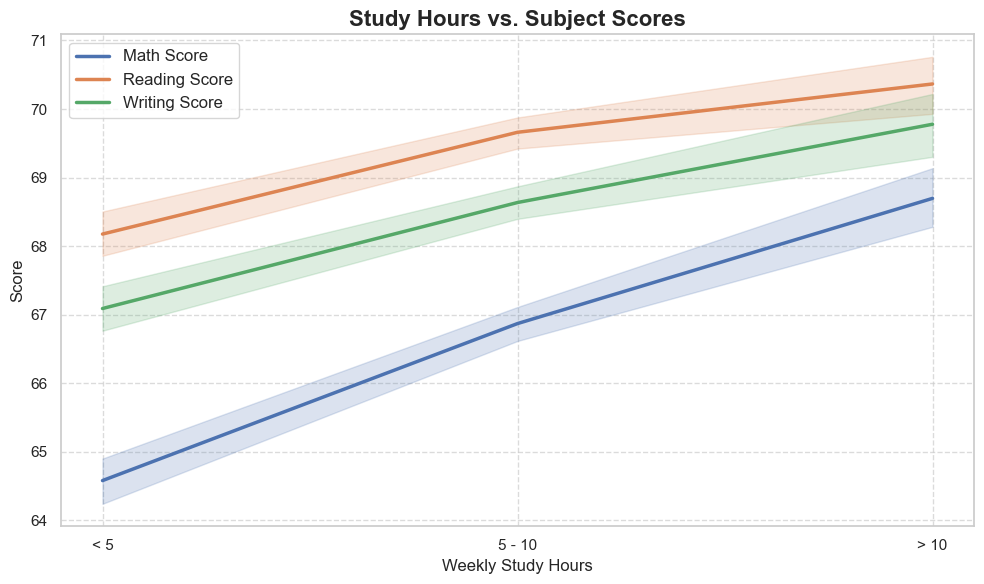

In [54]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.lineplot(x="WklyStudyHours", y="MathScore", data=df, label="Math Score", linewidth=2.5)
sns.lineplot(x="WklyStudyHours", y="ReadingScore", data=df, label="Reading Score", linewidth=2.5)
sns.lineplot(x="WklyStudyHours", y="WritingScore", data=df, label="Writing Score", linewidth=2.5)

plt.title("Study Hours vs. Subject Scores", fontsize=16, fontweight='bold')
plt.xlabel("Weekly Study Hours", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


#### The line plot indicates a positive correlation between weekly study hours and student scores. This suggests that, on average, students who spend more time studying tend to achieve higher results in the subject assessment than students who study less. However, the data points are somewhat dispersed, indicating that there is some variation in student scores within each study hour category.

## Distribution of students by ethnicity

In [43]:
print(df["EthnicGroup"].unique())

[nan 'group C' 'group B' 'group A' 'group D' 'group E']


C:\Users\sarad\AppData\Local\Temp\ipykernel_11852\132623418.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x="EthnicGroup", palette=colors)


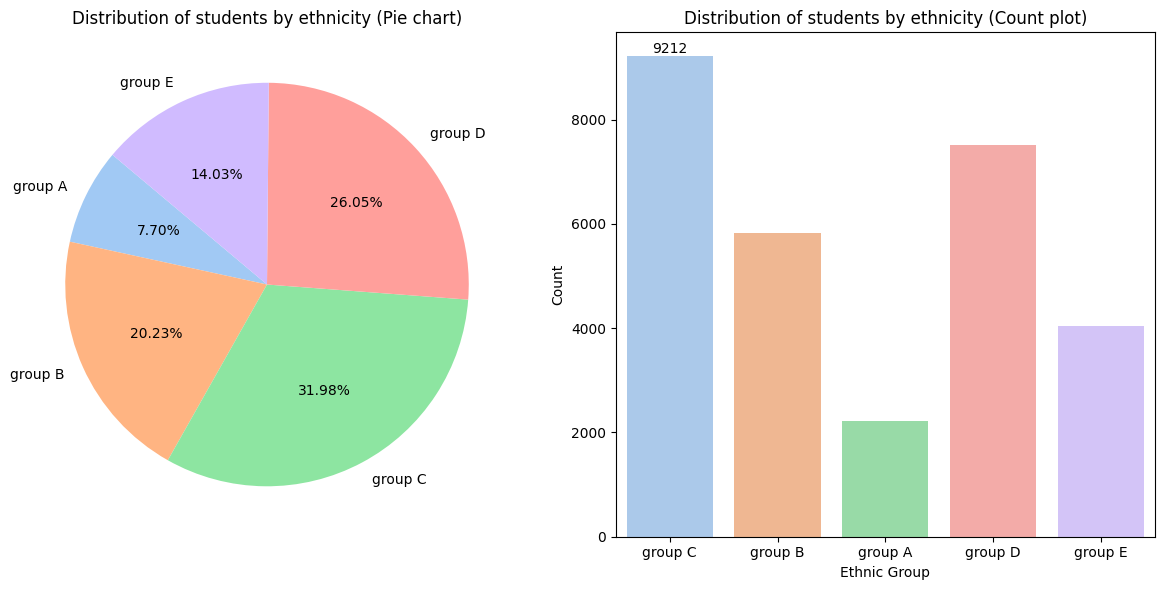

In [53]:

colors = sns.color_palette('pastel', 5)


groupA = df[df['EthnicGroup'] == 'group A'].shape[0]
groupB = df[df['EthnicGroup'] == 'group B'].shape[0]
groupC = df[df['EthnicGroup'] == 'group C'].shape[0]
groupD = df[df['EthnicGroup'] == 'group D'].shape[0]
groupE = df[df['EthnicGroup'] == 'group E'].shape[0]


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sizes = [groupA, groupB, groupC, groupD, groupE]
labels = ['group A', 'group B', 'group C', 'group D', 'group E']
plt.pie(sizes, labels=labels, autopct='%1.2f%%', colors=colors, startangle=140)
plt.title("Distribution of students by ethnicity (Pie chart)")


plt.subplot(1, 2, 2)
ax = sns.countplot(data=df, x="EthnicGroup", palette=colors)
ax.bar_label(ax.containers[0], fmt='%d')  # Formattiamo le etichette dei valori interi
plt.title("Distribution of students by ethnicity (Count plot)")
plt.xlabel("Ethnic Group")
plt.ylabel("Count")

plt.tight_layout()
plt.show()


#### It should be noted that ethnic groups are a very broad category. It is regrettable that the database does not provide information on the subdivision. However, it is still possible to ascertain that five ethnic groups have been identified. Group C represents the majority, while Groups B and D have similar values. Groups E and A represent minorities.

## Grades by gender in each subject.

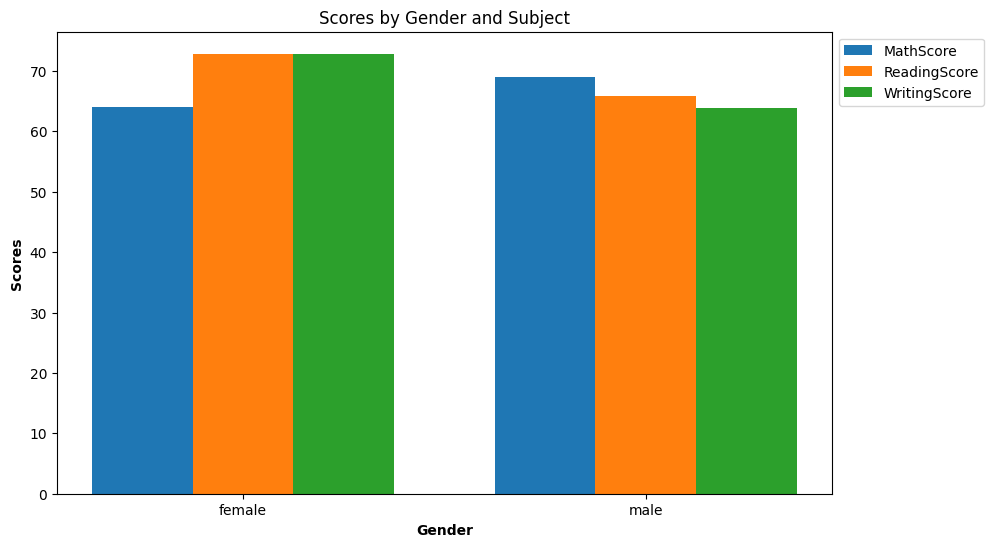

In [47]:
dfnew = pd.DataFrame(df)

labels = dfnew['Gender'].unique()
math_scores = dfnew.groupby('Gender')['MathScore'].mean()
reading_scores = dfnew.groupby('Gender')['ReadingScore'].mean()
writing_scores = dfnew.groupby('Gender')['WritingScore'].mean()

x = range(len(labels))
width = 0.25 

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar([pos - width for pos in x], math_scores, width, label='MathScore') 
rects2 = ax.bar(x, reading_scores, width, label='ReadingScore')
rects3 = ax.bar([pos + width for pos in x], writing_scores, width, label='WritingScore')

ax.set_xlabel('Gender', fontweight='bold')
ax.set_ylabel('Scores', fontweight='bold')
ax.set_title('Scores by Gender and Subject')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


#### The bar graph indicates that there is, although it is slight, a difference between males and females. As the data illustrates, male students tend to achieve higher marks in mathematics, while female students typically perform better in reading and writing.

C:\Users\sarad\AppData\Local\Temp\ipykernel_11852\2873151411.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Gender', y='MathScore', data=df, palette='Set1')


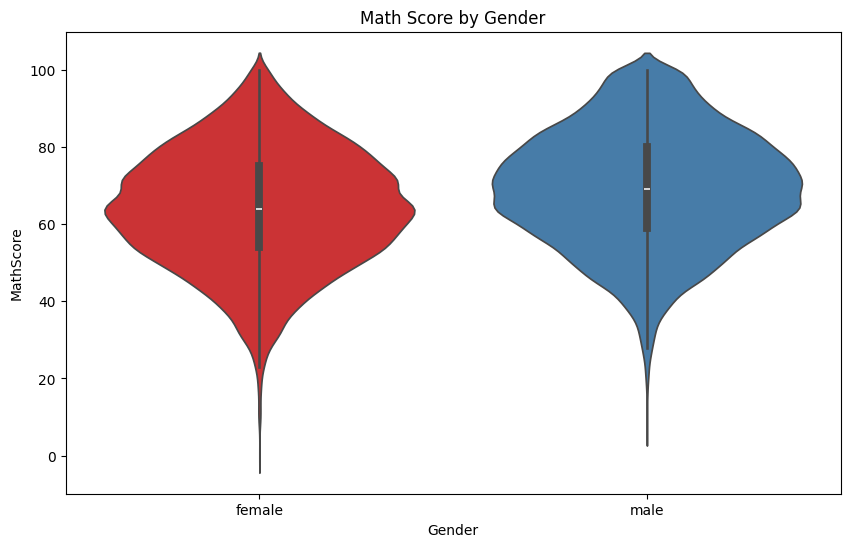

In [48]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Gender', y='MathScore', data=df, palette='Set1')
plt.title("Math Score by Gender")
plt.show()

C:\Users\sarad\AppData\Local\Temp\ipykernel_11852\305174538.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Gender', y='ReadingScore', data=df, palette='Set1')


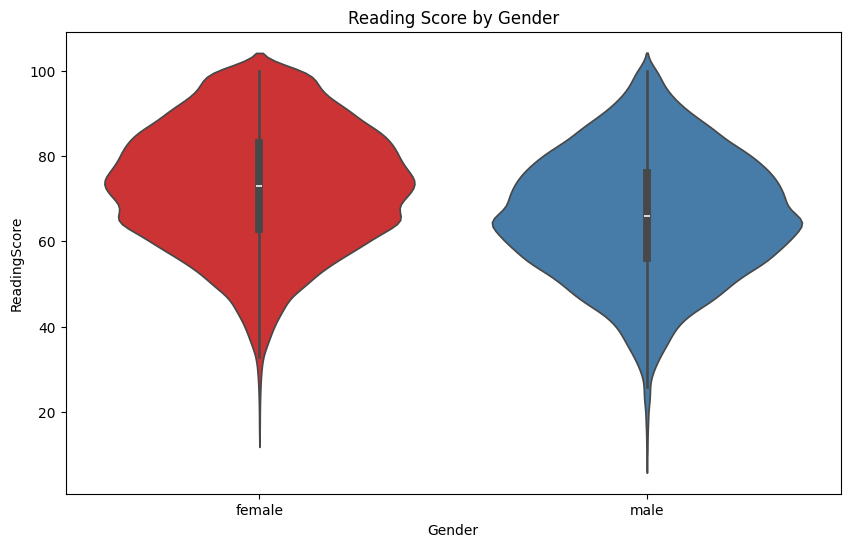

In [49]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Gender', y='ReadingScore', data=df, palette='Set1')
plt.title("Reading Score by Gender")
plt.show()